# Lab 6 Report

Seth Richards and Anup Paudel

In [8]:
# import cell

import numpy as np
from scipy.io import wavfile as wav
import simpleaudio as sa
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

In [9]:
def u(t):
    return 1 * (t>0)

def delta(t,fs):
    return fs * np.concatenate([[0],np.diff(u(t))])

## Summary

In this lab, we use the signal library from scipy to work with transfer functions as signal filters. First, we construct a low pass filter, showing it's magnitude, phase change, and it's affect on a signal(negative gain). Next, we make two signals corresponding to morse code dashes and dots (for later use) and concatenate them to make a new signal, and show the effect of modulation with a cosine function through displaying the signals and their Fourier transforms, showing us the FT of the signal duplicated and shifted. Then, we go through the process of demodulating the signal by using the cosine function to reshift and duplicate the function, before passing it through the filter we used earlier, returning the original signal. Finally, we use our learned understanding of the demodulation process to demodulate a given morse code csv, using a threshold statement to correlate the signal components to their respective character.

# Assignment 1: Filtering 

In [10]:
#A1

fs = 1000
t = np.arange(0,0.5,1/fs)
x1 = np.cos(100*t)
nfft = 8192
b = [0,200]
a = [1,200]

sys = signal.lti(b, a)
f = np.arange(-nfft/2, nfft/2, 1)*(fs/nfft)
omega = f*2*np.pi
omega2, h_f = signal.freqresp(sys, omega)

<IPython.core.display.Javascript object>


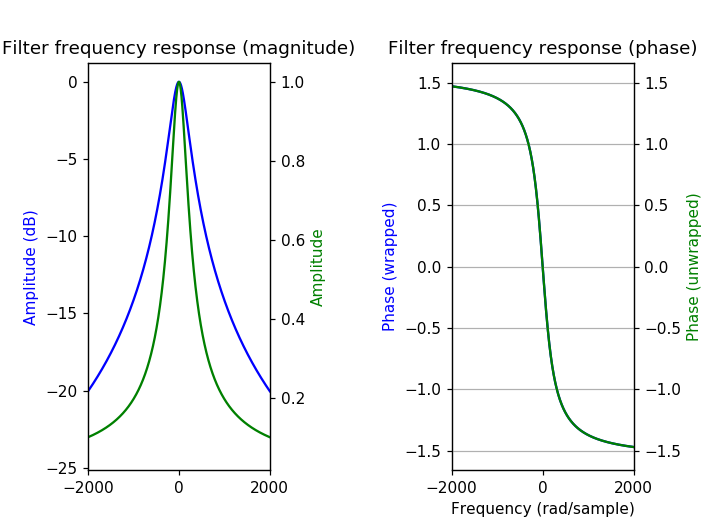

(-2000, 2000)

In [11]:
fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=0.5,wspace=1)


ax1 = fig1.add_subplot(1,2,1)
plt.title('Filter frequency response (magnitude)')
plt.plot(omega, 20*np.log10(abs(h_f)), 'b')
plt.ylabel('Amplitude (dB)', color='b')
ax2 = ax1.twinx()
plt.plot(omega, abs(h_f), 'g')
plt.ylabel('Amplitude', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.xlim(-2000, 2000)
plt.show()

ax1 = fig1.add_subplot(1,2,2)
plt.title('Filter frequency response (phase)')
plt.plot(omega, np.angle(h_f), 'b')
plt.ylabel('Phase (wrapped)', color='b')
plt.xlabel('Frequency (rad/sample)')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h_f))
plt.plot(omega, angles, 'g')
plt.ylabel('Phase (unwrapped)', color='g')
plt.grid()
plt.axis('tight')
plt.xlim(-2000, 2000)

<IPython.core.display.Javascript object>


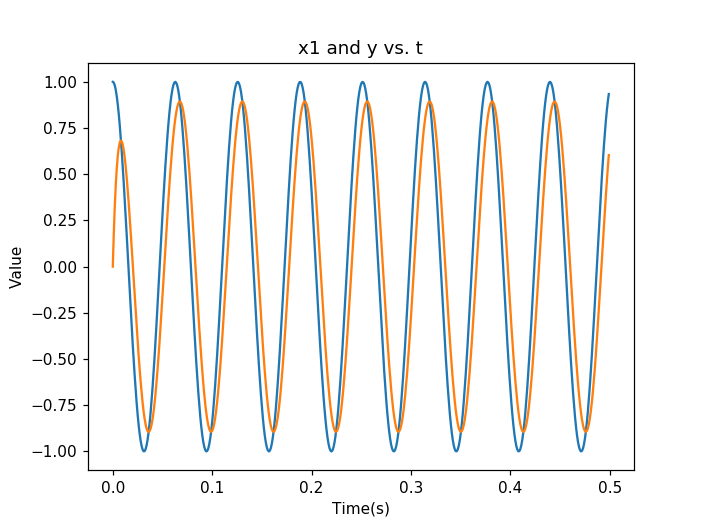

Text(0, 0.5, 'Value')

In [12]:
ty, y, xs = signal.lsim((b, a), x1, t)

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(1,1,1)
plt.title('x1 and y vs. t')
plt.plot(t,x1)
plt.plot(ty,y)
plt.xlabel('Time(s)')
plt.ylabel('Value')

### Discussion

If two filters identical to the one used above were put in series, the amplitude of the output would be smaller than that of a single filter because the gain is negative, meaning the filter will reduce the signal going through it each time it goes through.

## Assignment 2 : Amplitude Modulation 

In [13]:
#A2

fs = 4000
t = np.arange(0,0.5,1/fs)
x1 = 50 * t * np.exp(-15*t) * u(t)
x0 = -x1

In [14]:
xf = np.fft.fft(x1,nfft) # FFT of time signal x, nfft frequency samples
xfs = np.fft.fftshift(xf) # shift FFT of xf to be centered around 0

f = np.arange(-nfft/2,nfft/2,1)

<IPython.core.display.Javascript object>


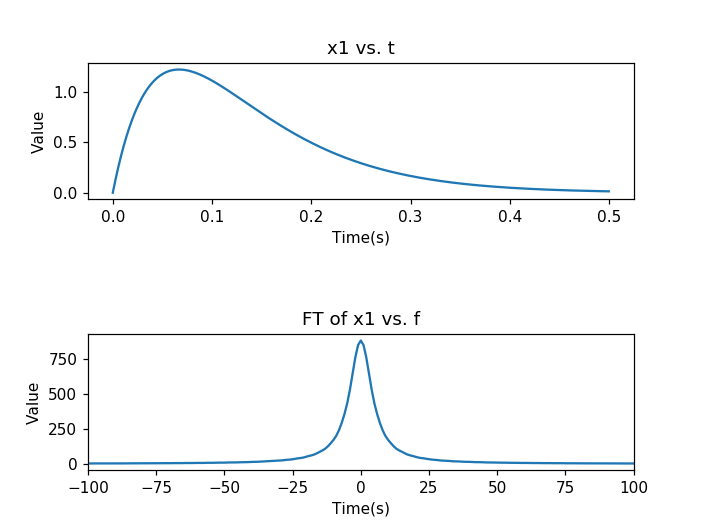

Text(0, 0.5, 'Value')

In [15]:
fig3 = plt.figure(3)
fig3.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(2,1,1)
plt.title('x1 vs. t')
plt.plot(t,x1)
plt.xlabel('Time(s)')
plt.ylabel('Value')

plt.subplot(2,1,2)
plt.title('FT of x1 vs. f')
plt.xlim(-100,100)
plt.plot(f,np.abs(xfs))
plt.xlabel('Time(s)')
plt.ylabel('Value')

In [16]:
xm = np.concatenate([x1,x0,x1,x0])
t1 = np.arange(0,2,1/fs)
c = np.cos(200 * t1)

y = xm * c

<IPython.core.display.Javascript object>


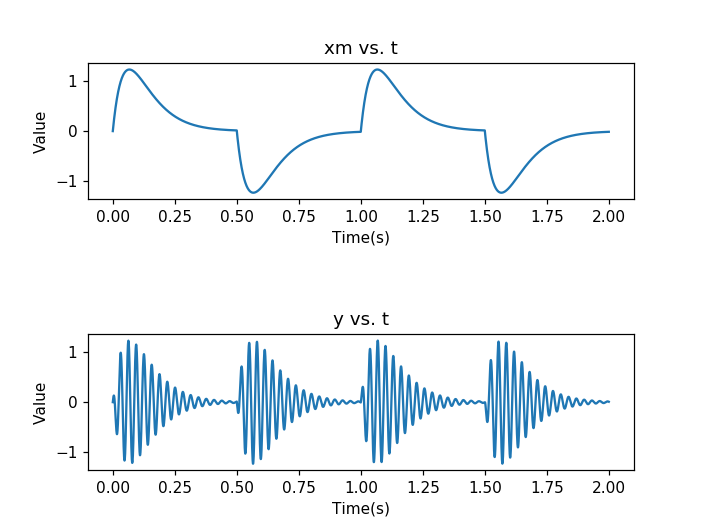

Text(0, 0.5, 'Value')

In [17]:
fig4 = plt.figure(4)
fig4.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(2,1,1)
plt.title('xm vs. t')
plt.plot(t1,xm)
plt.xlabel('Time(s)')
plt.ylabel('Value')

plt.subplot(2,1,2)
plt.title('y vs. t')
plt.plot(t1,y)
plt.xlabel('Time(s)')
plt.ylabel('Value')

In [18]:
xfxm = np.fft.fft(xm,nfft) # FFT of time signal x, nfft frequency samples
xfsxm = np.fft.fftshift(xfxm) # shift FFT of xf to be centered around 0

xfc = np.fft.fft(c,nfft) # FFT of time signal x, nfft frequency samples
xfsc = np.fft.fftshift(xfc) # shift FFT of xf to be centered around 0

xfy = np.fft.fft(y,nfft) # FFT of time signal x, nfft frequency samples
xfsy = np.fft.fftshift(xfy) # shift FFT of xf to be centered around 0

f1 = np.arange(-nfft/2,nfft/2,1)*(fs/nfft)

<IPython.core.display.Javascript object>


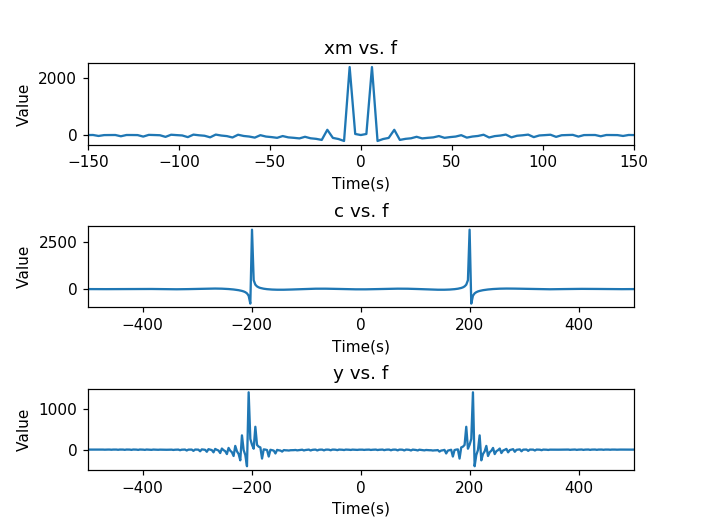

C:\Users\SethR\AppData\Roaming\Python\Python37\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Value')

In [19]:
omega = 2 * f1 * np.pi
fig5 = plt.figure(5)
fig5.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(3,1,1)
plt.title('xm vs. f')
plt.xlim(-150,150)
plt.plot(omega,xfsxm)
plt.xlabel('Time(s)')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.title('c vs. f')
plt.xlim(-500,500)
plt.plot(omega,xfsc)
plt.xlabel('Time(s)')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.title('y vs. f')
plt.xlim(-500,500)
plt.plot(omega,xfsy)
plt.xlabel('Time(s)')
plt.ylabel('Value')

### Discussion

Linearity
1. y(t) = x(t)cos(200t)
2. ay1(t) + by2(t) = ax(t)cos(200t) + bx(t)cos(200t)
3. T{ax1(t) + bx2(t)} = (ax1(t) + bx2(t))cos(200t) = ax(t)cos(200t) + bx(t)cos(200t)
4. Expressions are the same, so system is linear

Time Invariance
1. y(t) = x(t)cos(200t)
2. y(t-t0) = x(t-t0)cos(200(t-t0))
3. T{x(t-t0)} = x(t-t0)cos(200t)
4. Expressions are different, so system is not time invariant

## Assignment 3 : Amplitude Demodulation

In [20]:
#A3
z = y * c

xfz = np.fft.fft(z,nfft) # FFT of time signal x, nfft frequency samples
xfsz = np.fft.fftshift(xfz) # shift FFT of xf to be centered around 0

<IPython.core.display.Javascript object>


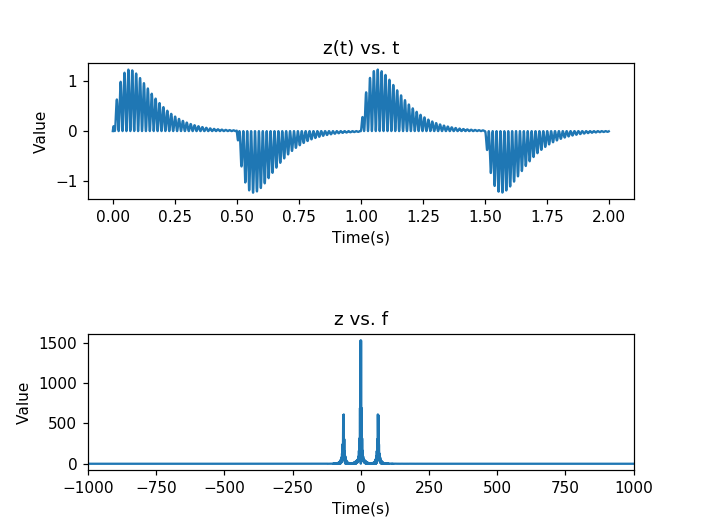

Text(0, 0.5, 'Value')

In [21]:
fig6 = plt.figure(6)
fig6.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(2,1,1)
plt.title('z(t) vs. t')
plt.plot(t1,z)
plt.xlabel('Time(s)')
plt.ylabel('Value')

plt.subplot(2,1,2)
plt.title('z vs. f')
plt.xlim(-1000,1000)
plt.plot(f1,np.abs(xfsz))
plt.xlabel('Time(s)')
plt.ylabel('Value')

In [22]:
b = [2*(10**9)]
a = [(240),(3*(10**4)),(2.2*(10**6)),(10**8),(2*(10**9))]
sys = [b,a]

omega = 2 * f * np.pi
omega2, h_f1 = signal.freqresp(sys, omega)

angles = np.unwrap(np.angle(h_f1))

<IPython.core.display.Javascript object>


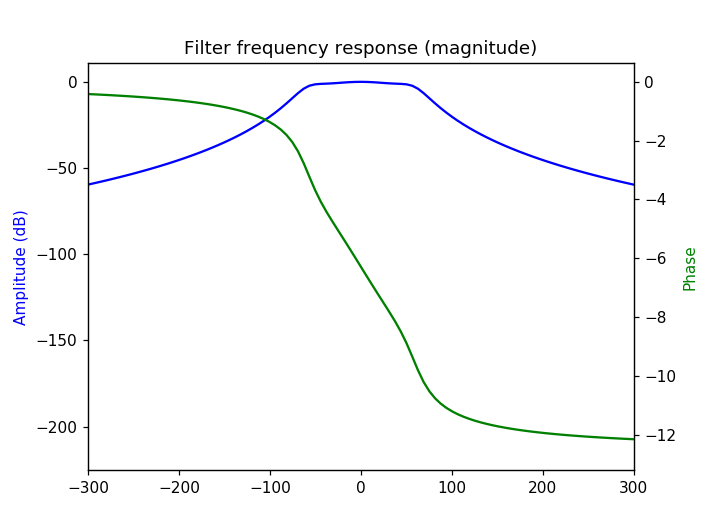

In [23]:
fig7 = plt.figure(7)
fig7.subplots_adjust(hspace=0.5,wspace=1)


ax3 = fig7.add_subplot(1,1,1)
plt.title('Filter frequency response (magnitude)')
plt.plot(omega, 20*np.log10(abs(h_f1)), 'b')
plt.ylabel('Amplitude (dB)', color='b')
ax4 = ax3.twinx()
plt.plot(omega, angles, 'g')
plt.ylabel('Phase', color='g')
plt.xlabel('Frequency (rad/sample)')
plt.xlim(-300, 300)
plt.show()

In [24]:
txr, xr, xsr = signal.lsim((b, a), z, t1)

xfxr = np.fft.fft(xr,nfft) # FFT of time signal x, nfft frequency samples
xfsxr = np.fft.fftshift(xfxr) # shift FFT of xf to be centered around 0

<IPython.core.display.Javascript object>


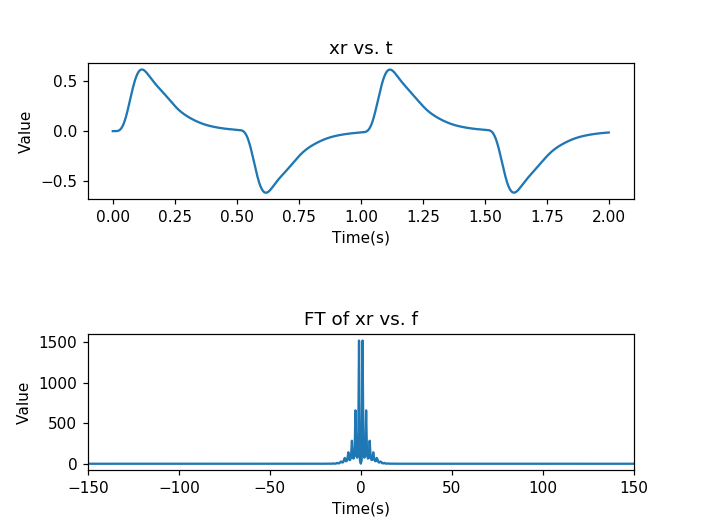

Text(0, 0.5, 'Value')

In [25]:
fig8 = plt.figure(8)
fig8.subplots_adjust(hspace=1,wspace=0.4)

plt.subplot(2,1,1)
plt.title('xr vs. t')
plt.plot(txr,xr)
plt.xlabel('Time(s)')
plt.ylabel('Value')

plt.subplot(2,1,2)
plt.title('FT of xr vs. f')
plt.xlim(-150,150)
plt.plot(f1,np.abs(xfsxr))
plt.xlabel('Time(s)')
plt.ylabel('Value')

### Discussion

The student's solution will not work becuase the expression they used is at a higher frequency than the one we use, which is outside of the low pass filter, meaning the signal will be filtered out to nothing. If the frequency is high enough, it may surpass the Nyquist rate and lose part of the signal, rendering it unrecoverable.

## Assignment 4 : Decoding a Morse Code Message

In [26]:
#A4

file = open('message_modulated.csv','rb')
yt = np.loadtxt(file, delimiter=',')

In [27]:
def decoder(y,c,t,fs,nfft,x1,x0):
    b = [2*(10**9)]
    a = [(240),(3*(10**4)),(2.2*(10**6)),(10**8),(2*(10**9))]
    c = np.cos(c * t1)
    yn = y * c
    
    tx, x, xs = signal.lsim((b, a), yn, t)
    xH = np.zeros(2000)
    error = np.zeros([4,2])
    print()
    str = ""
    for i in range(4):
        xH = x[0+ 2000*i : 2000 + 2000*i]
        error[i,0] = np.sum(np.square(xH - x0))
        error[i,1] = np.sum(np.square(xH - x1))
        if (error[i,0] + error[i,1] < 1500):
            str = str + "" 
        elif(error[i,0] > error[i,1]):
            str = str + "-"
        else:
            str = str + "."
    
    return str

In [28]:
t = np.arange(0,2,1/fs)
c = [100,200,400]

for i in range(3):
    str1 = decoder(yt,c[i],t,fs,nfft,x1,x0)
    print("Message mi(",i,") is: ",str1)



Message mi( 0 ) is:  -.--

Message mi( 1 ) is:  ---

Message mi( 2 ) is:  ..-


### Discussion

The matched filter from Lab 4 is more robust because it depends on convolving signals, which takes into account the magnitude of every value in the original signal array without simply averaging the noise and hoping to get rid of it, and the correlation is based on that, vs. the method implemented in this lab which is dependent on a simple threshold. Depending on the noise (which may not average as expected), the transmitted signal, and other environmental factors, that threshold may be too inclusive or too exclusive, translating the signal into the wrong characters.

The message is: The future of technology lies in "you".